# Часть 1. Аналитика данных

Источник: https://github.com/datasets/covid-19/blob/master/data/time-series-19-covid-combined.csv

**Распространиение болезни** (статистика по каждой стране с интервалом в месяц):

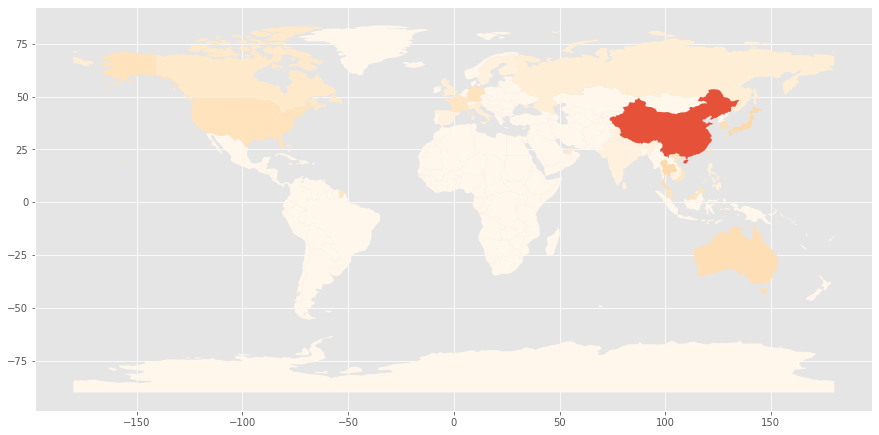

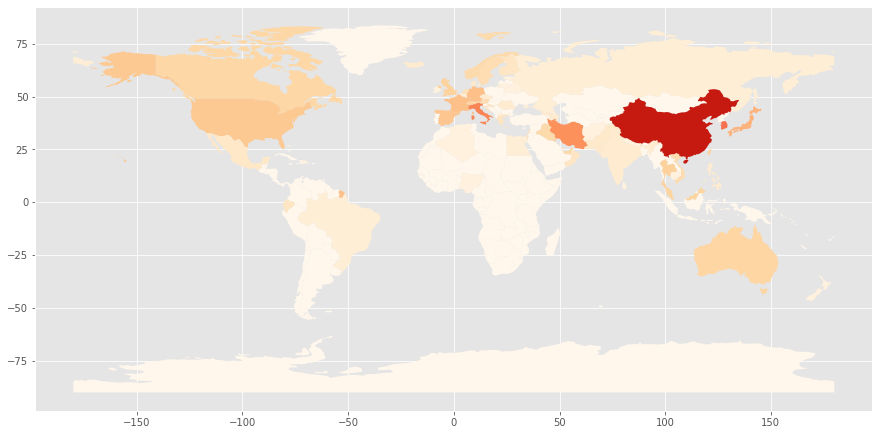

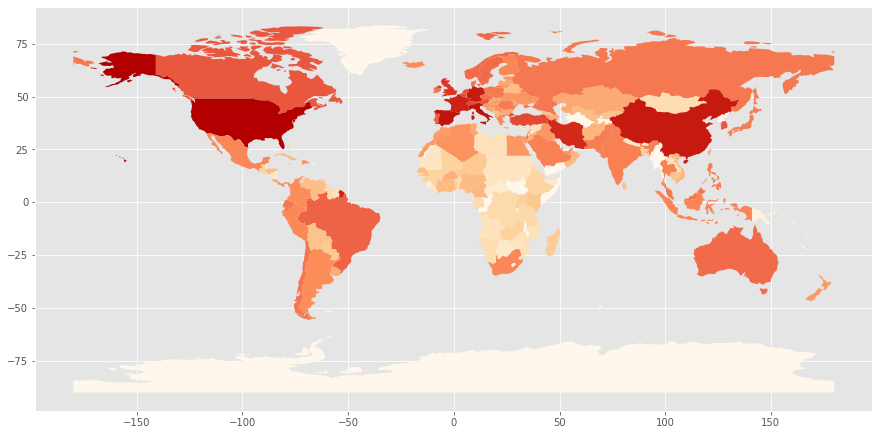

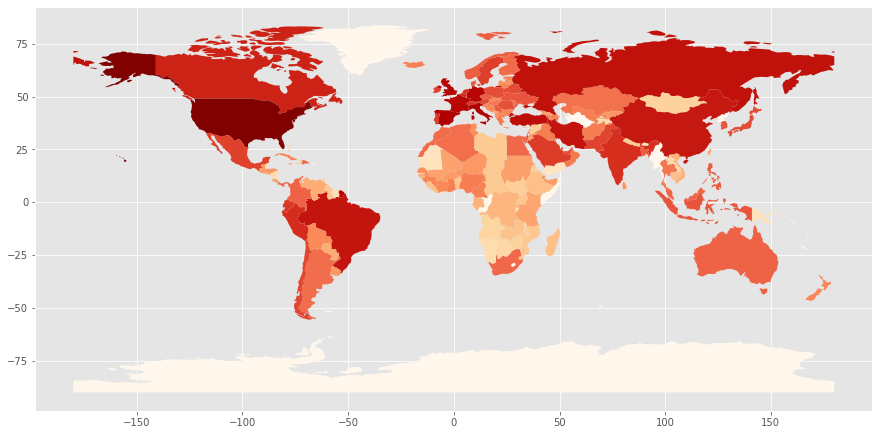

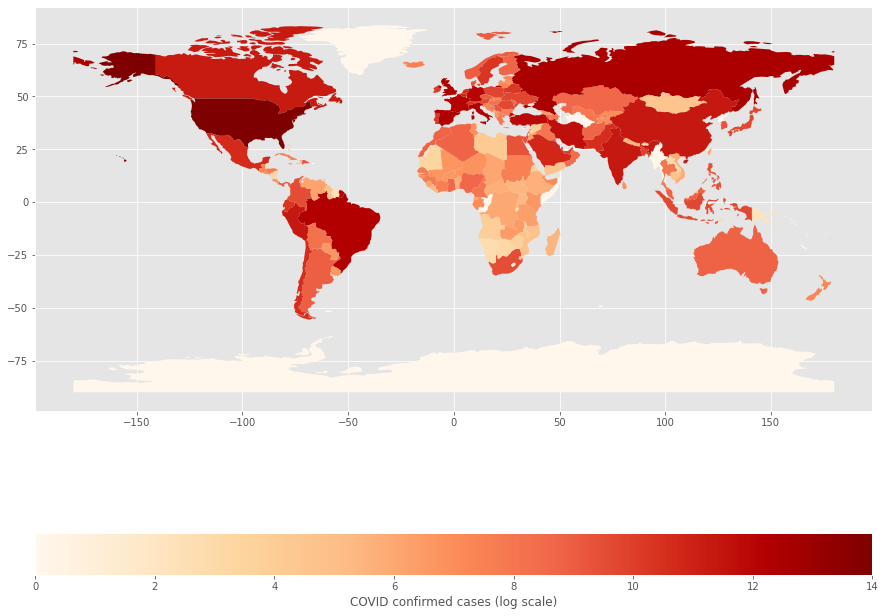

In [0]:
# ДАТЫ: 2020-02-01, 2020-03-01, 2020-04-01, 2020-05-01, 2020-05-16 

**Вывод:**

По карте распространения болезни видно, что Китай был источником вируса. 2 месяца ситация развивалась не так стремительно (ухудшение наблюдалось в Италии, Южной Корее и Иране), но потом начался резкий рост числа зараженных. Сейчас особо страдает США. Для наглядности шкала раскраски представлена в логарифмическом масштабе.

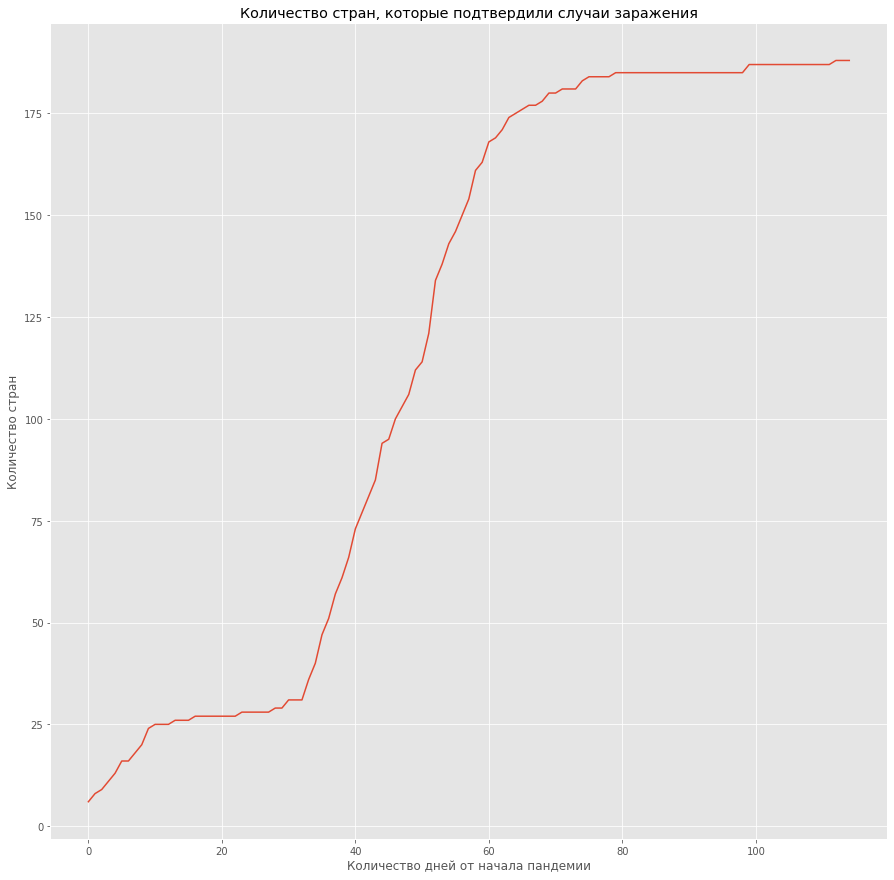

In [0]:
# Визуализирован рост количества стран, подтвердивших случаи заражения, по дням

**Вывод:**

Сначала лишь небольшое количество стран подтвердило случаи заражения, затем, спустя почти 20 дней неизменного количества (как раз инкубационный период 14 дней) начинается резкий рост количества стран, подтвердивших случаи заражения. Сейчас за редким исключением все страны подтвердили наличие зараженных.

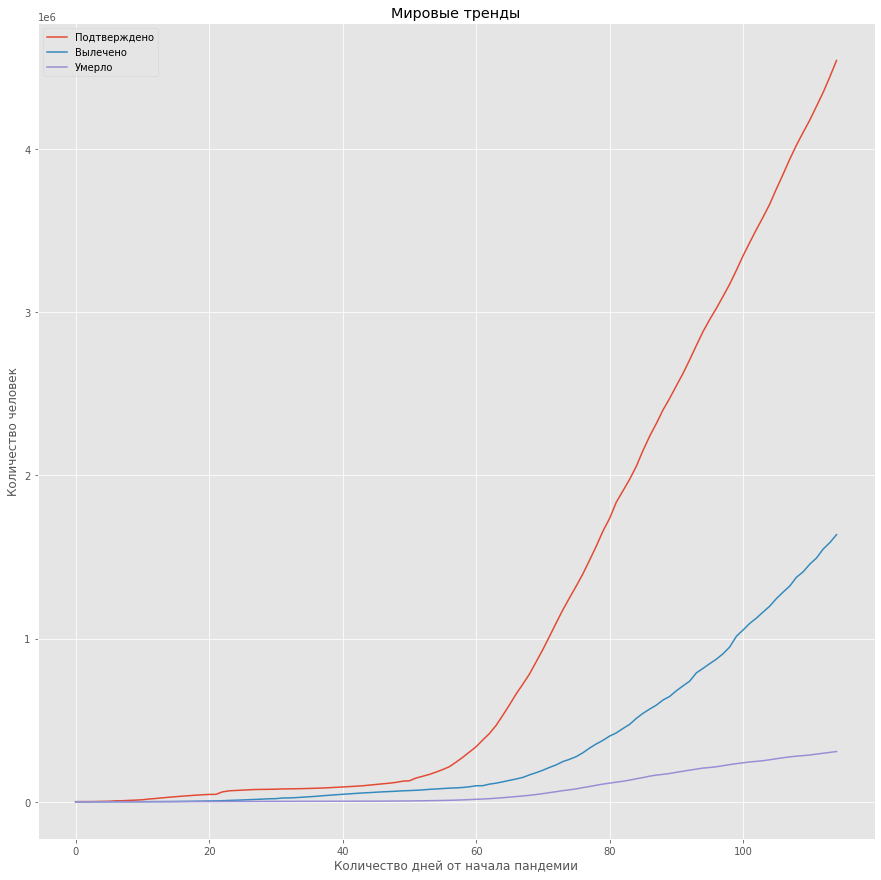

In [0]:
# Визуализированы мировые тренды по числу заболевших | погибших | выздоровивших

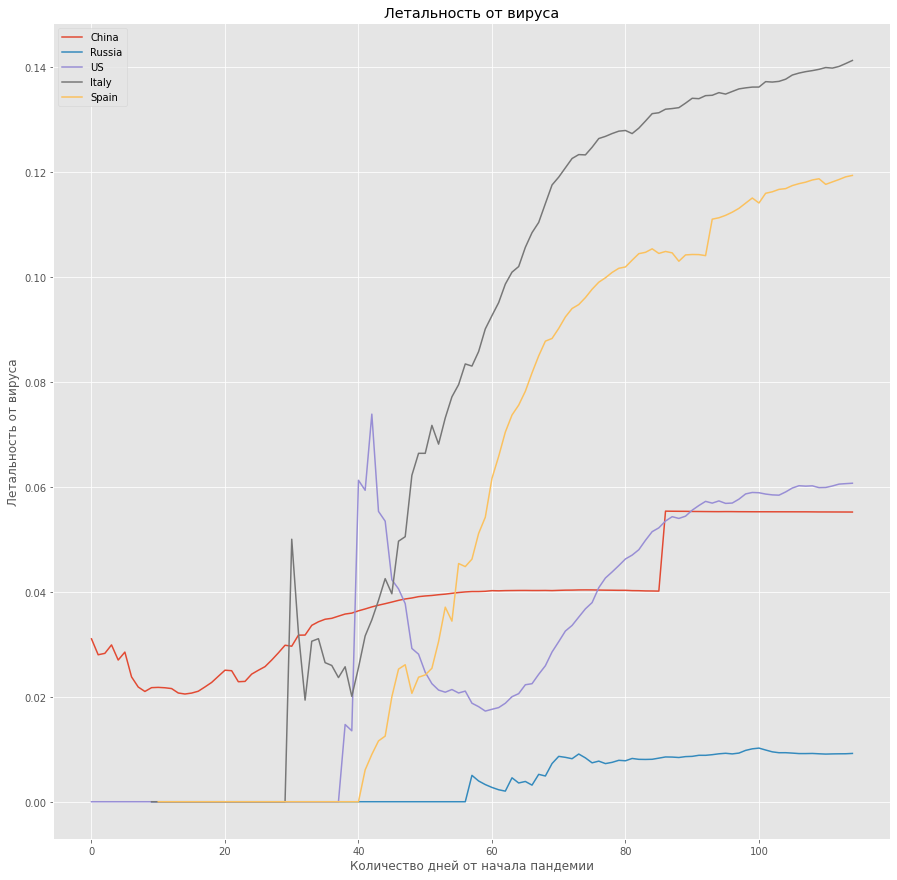

In [0]:
# Построены графики, которые отражают летальность от вируса в разных странах

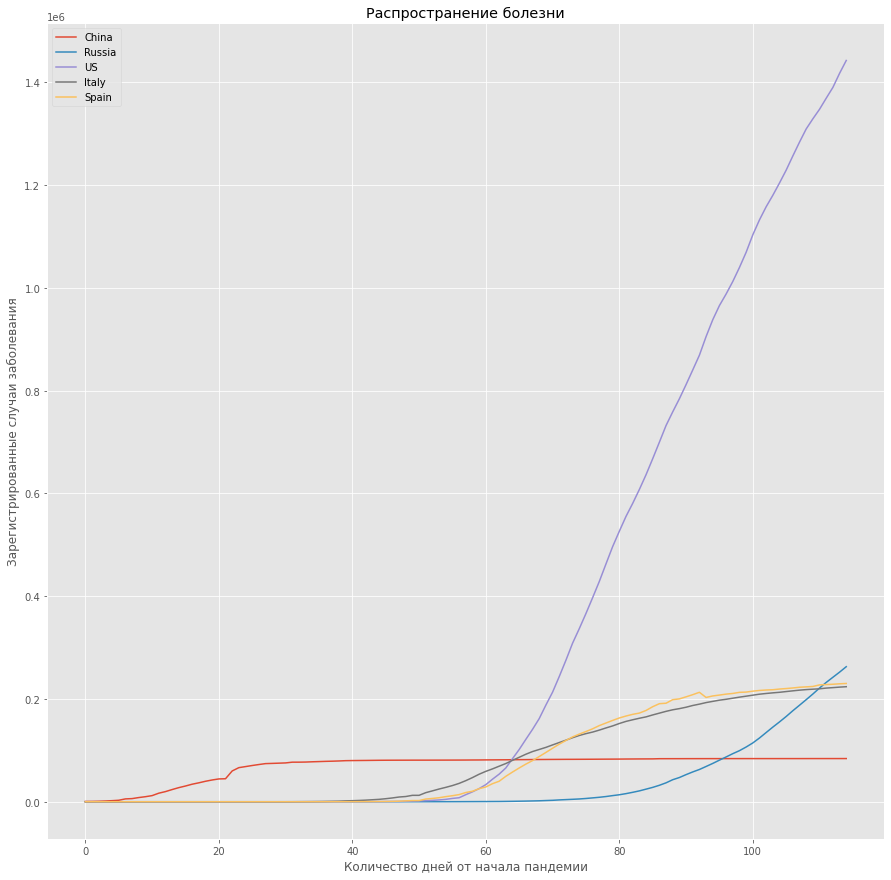

In [0]:
# Визуализация распространения болезни в разных странах 

**Вывод:**

В разных странах болезнь распространялась разными темпами, рост начинался в разные дни. По графику видно, что первыми начали расти темпы в Китае. Хуже всего ситуация развивается в США. Китай уже пережил пик пандемии, т.к. количество новых случаев не изменяется. В это же время в остальных странах все еще наблюдается рост.

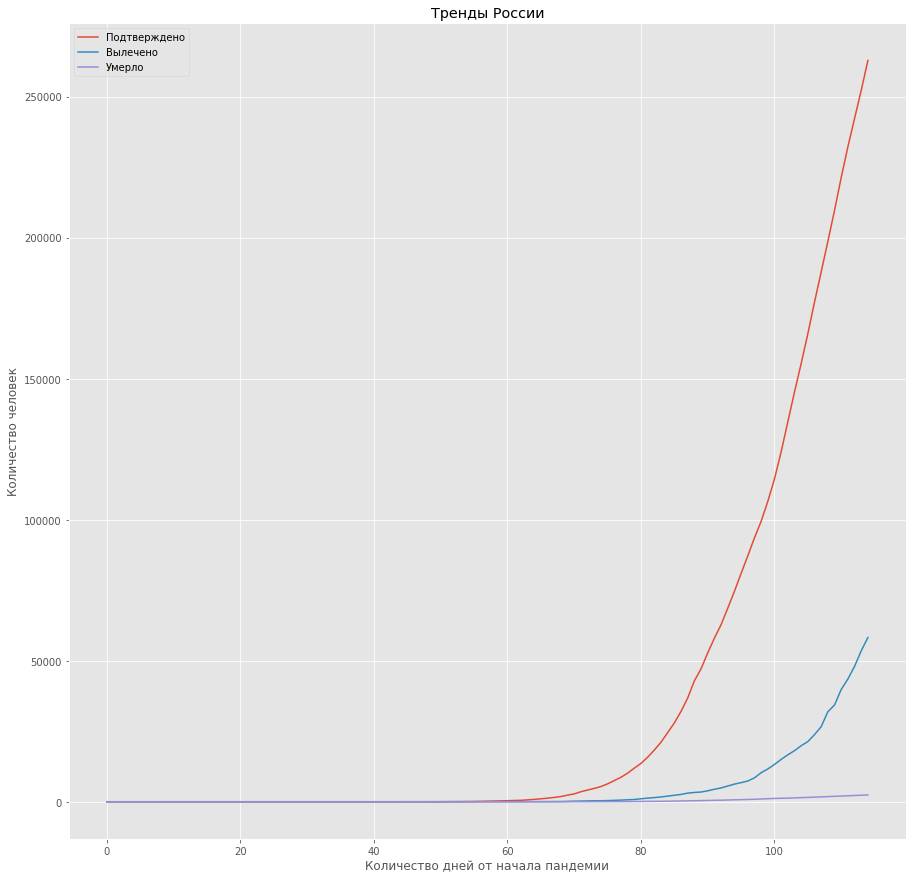

In [0]:
# Визуализация развивития ситуации в России

**Вывод:**

России долгое время удавалось сдерживать рост пандемии. Первый заболевший появился спустя 9 дней после начала отсчета. Но резкий рост числа подтвержденных случаев начинается с 50-го дня. С 70 дня начинается более плавный рост числа вылеченных (это значит, что лечение занимает немного меньше 20 дней), но рост не такой резкий, как для подтвержденных случаев - это значит, что многие еще болеют и болезнь в общем случа длится долго. Начиная с 80-го дня начинается небольшой рост смертности.

В сопоставлении с общемировыми показателями. Начало роста подтвержденных случаев заражения - 5, начало роста выздоровевших - 20, начало роста смертельных случаев - 50.

In [0]:
# топ-10 стран, которые лидируют по имеющимся в датасете показателям

Топ-10 стран по количеству случаев заражения: ['US' 'Russia' 'United Kingdom' 'Spain' 'Italy' 'Brazil' 'France'
 'Germany' 'Turkey' 'Iran']
Топ-10 стран по количеству случаев выздоровления: ['US' 'Germany' 'Spain' 'Italy' 'Turkey' 'Iran' 'Brazil' 'China' 'France'
 'Russia']
Топ-10 стран по количеству случаев смерти: ['US' 'United Kingdom' 'Italy' 'France' 'Spain' 'Brazil' 'Belgium'
 'Germany' 'Iran' 'Canada']


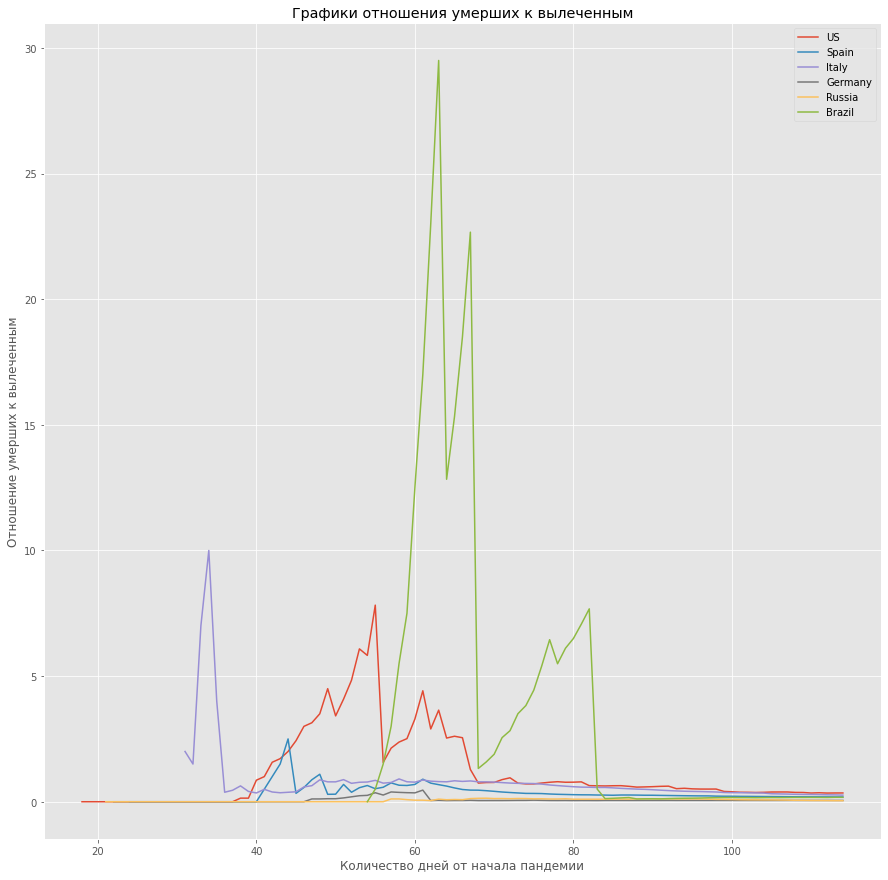

In [0]:
# Для первых 5 стран из топ-10 и России построены сравнительные графики: 
# значения отношений погибших/выздоровивших, погибших/заболевших, заболевших/общее число жителей

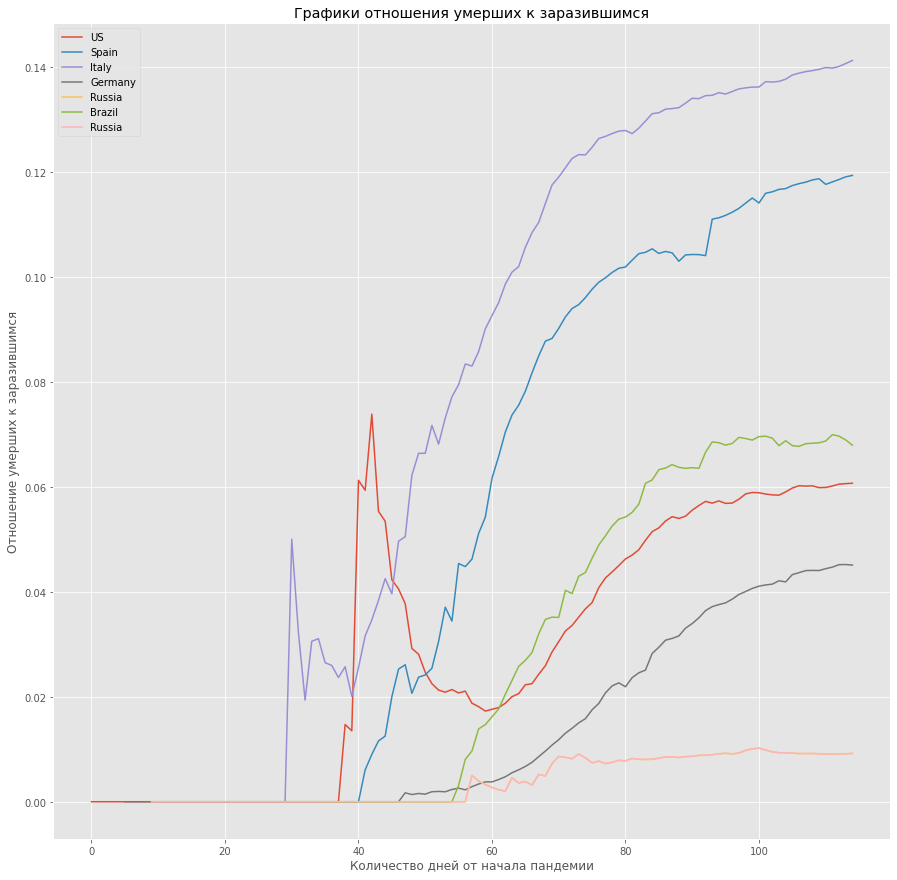

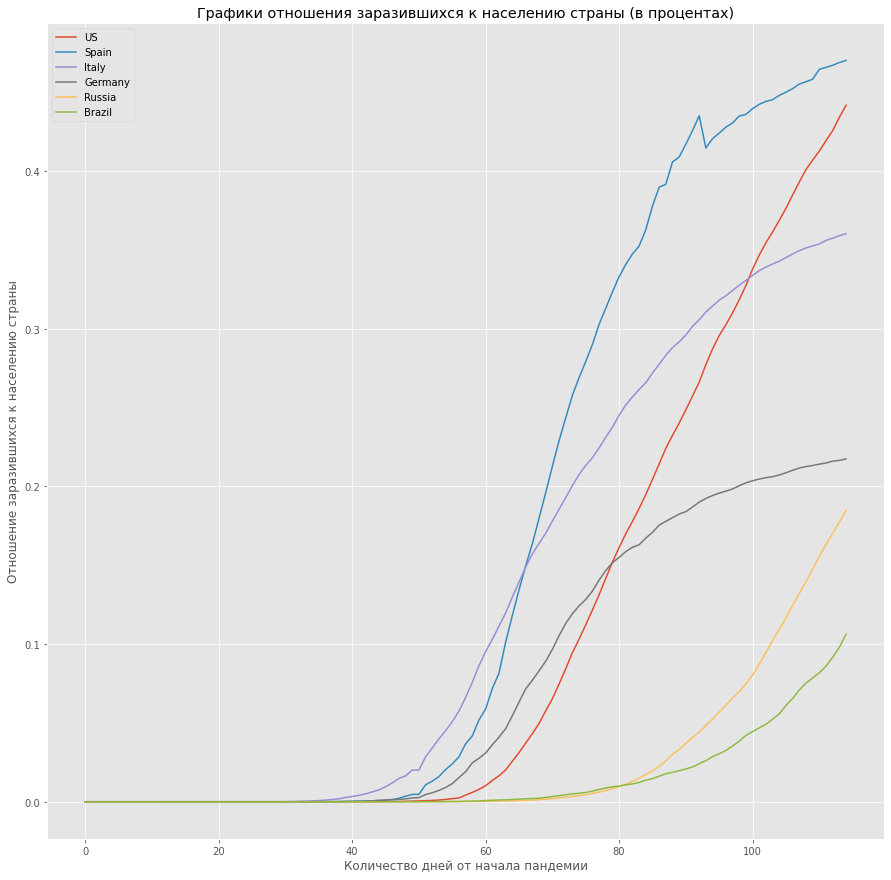

Выделен временной ряд по приросту количества зараженных. Для выделенного временного ряда:
  - Временной ряд представлен в виде последовательности разницы между значениями.
  - Временной ряд декомпозирован, построен график тренда.
  - Ряд исследован на стационарность.

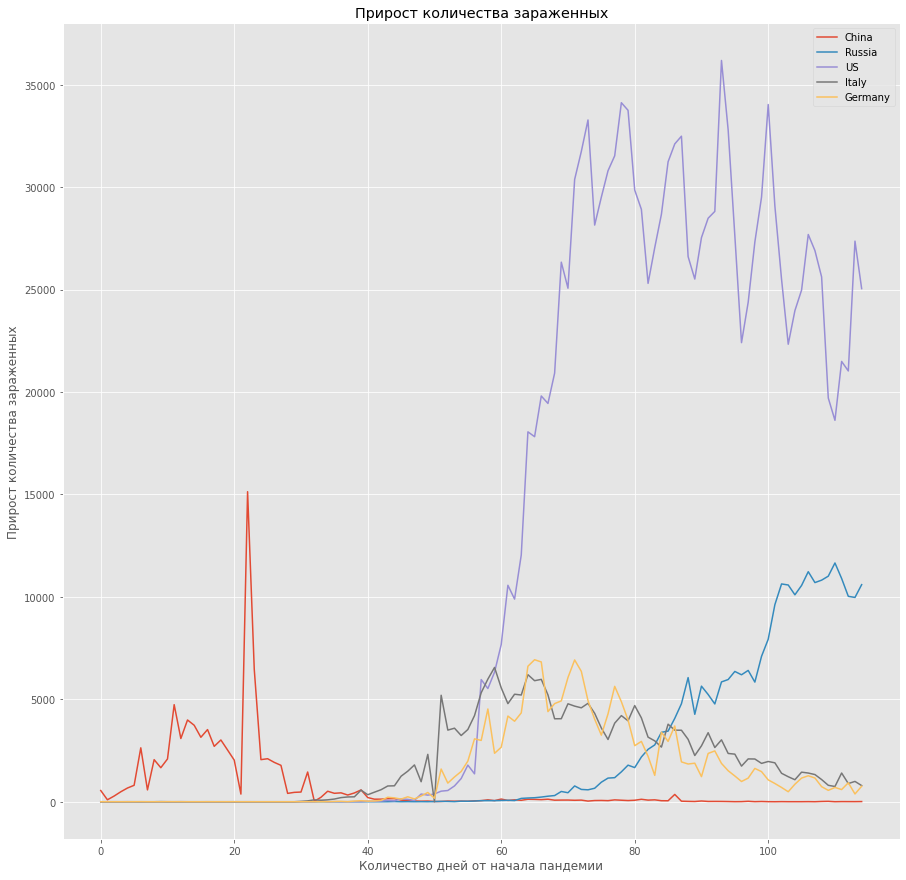

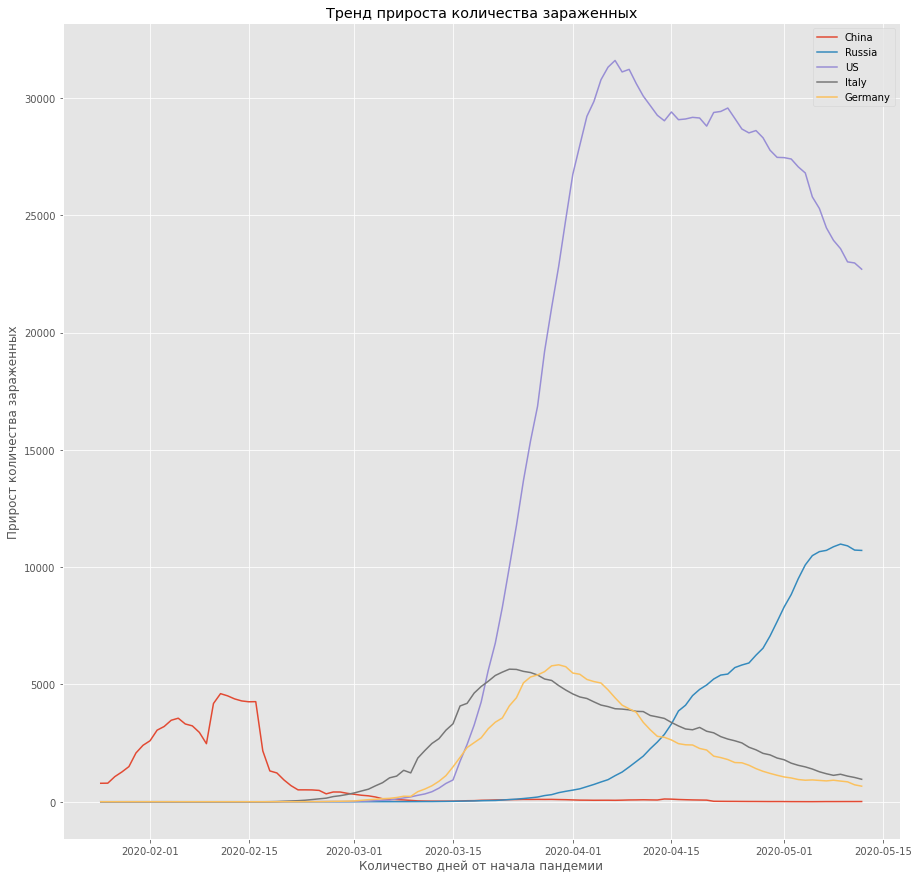

In [0]:
#проверим ряд, например, для России на стационарность

adf:  -2.6335693041018122
p-value:  0.08625573361843564
Critical values:  {'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
Есть единичные корни, ряд не стационарен


По графикам видно, что тренд растет в России. В остальных странах тренд уже идет на спад. В Китае уже практически нет прироста.

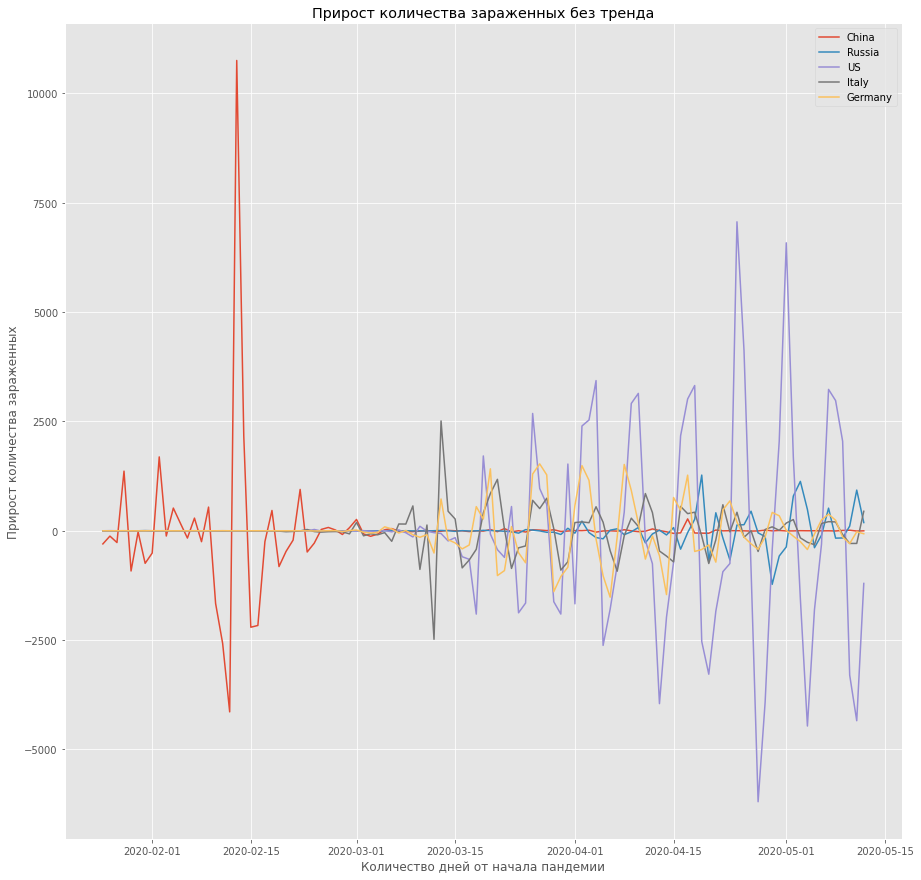

In [0]:
#проверим ряд без тренда для России на стационарность

adf:  -10.110289992788823
p-value:  1.0045082728768338e-17
Critical values:  {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
Единичных корней нет, ряд стационарен


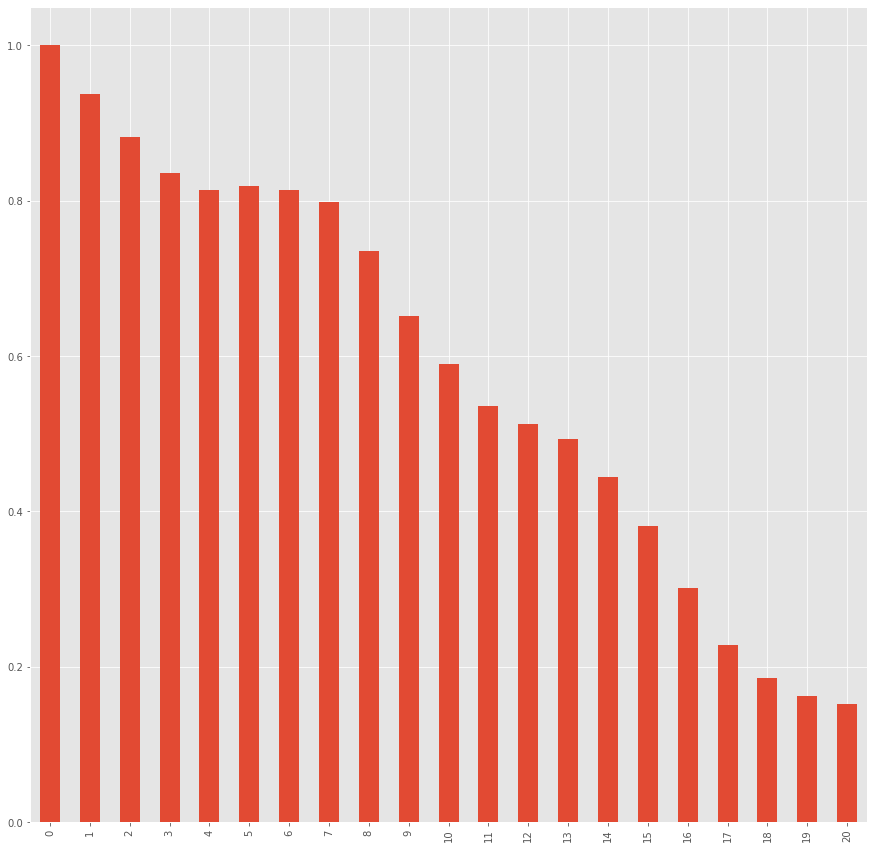

In [0]:
# график ACF для России

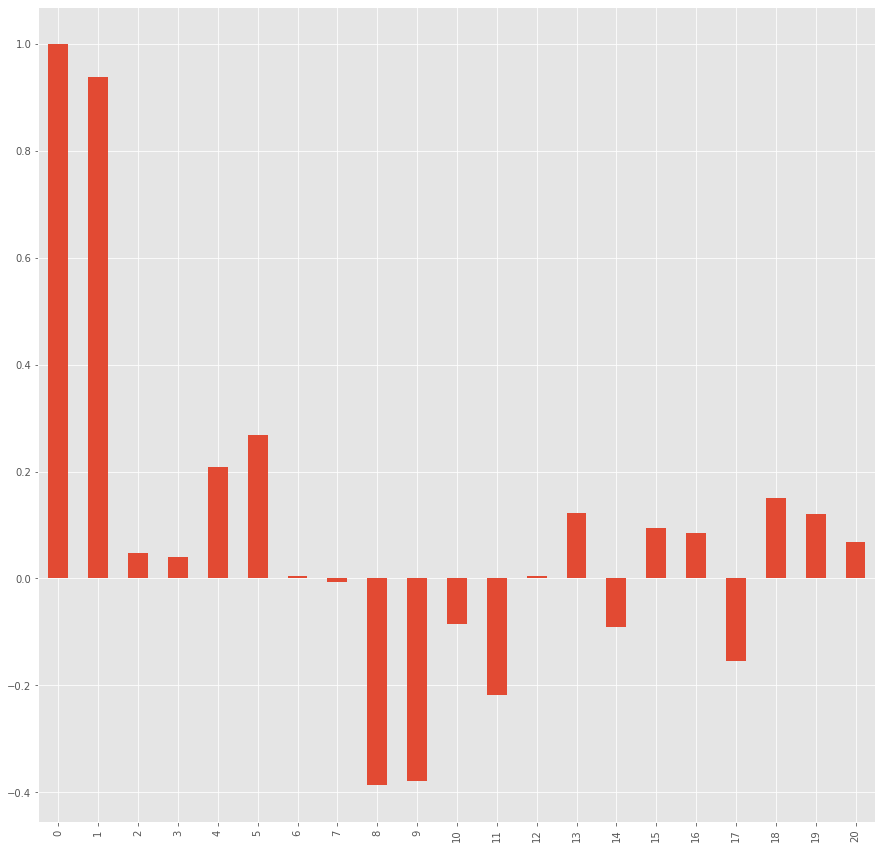

In [0]:
# график PACF для России

Графики построенны для прироста числа зараженных в России.

По графику автокорреляционной функции (ACF) можно определить порядок MA компоненты в ARMA модели. Количество компонентов, сильно отличных от нуля - 2-3.

По графику чистично автокорреляционной функции (PACF) можно определить порядок AR компоненты - 2.

# Часть 2. Прогнозирование временного ряда

Необходимо построить несколько моделей и спрогнозировать временной ряд для такого показателя как летальности от вируса. Летальность можно рассчитывать по формуле:

$$ CFR = \frac{Deaths}{Confirmed} $$

Метрика качества RMSE. Временной ряд нужно разбивать на данные для обучения и тестовые.


Будем сравнивать ситуации в России, США и Европе (тренд в Европе задают Италия и Испания, а теперь еще и Россия). В России ситуация для нас интереснее всего. В США и Европе ситуация все еще развивается стремительно (в отличие от Китая, который уже пережил пик пандемии), поэтому нам она тоже интересна.

Возьмем данные за последние 2 недели в качестве тестовых данных. Данные отфильтруем так, чтобы учитывать время только с момента первого умершего в регионе. 

#### Линейная модель (Linear Trend Model) 

Для построения предсказания с помощью линейной модели возьмем bias и коэффициент наклона, а затем построим соответствующие прямые.



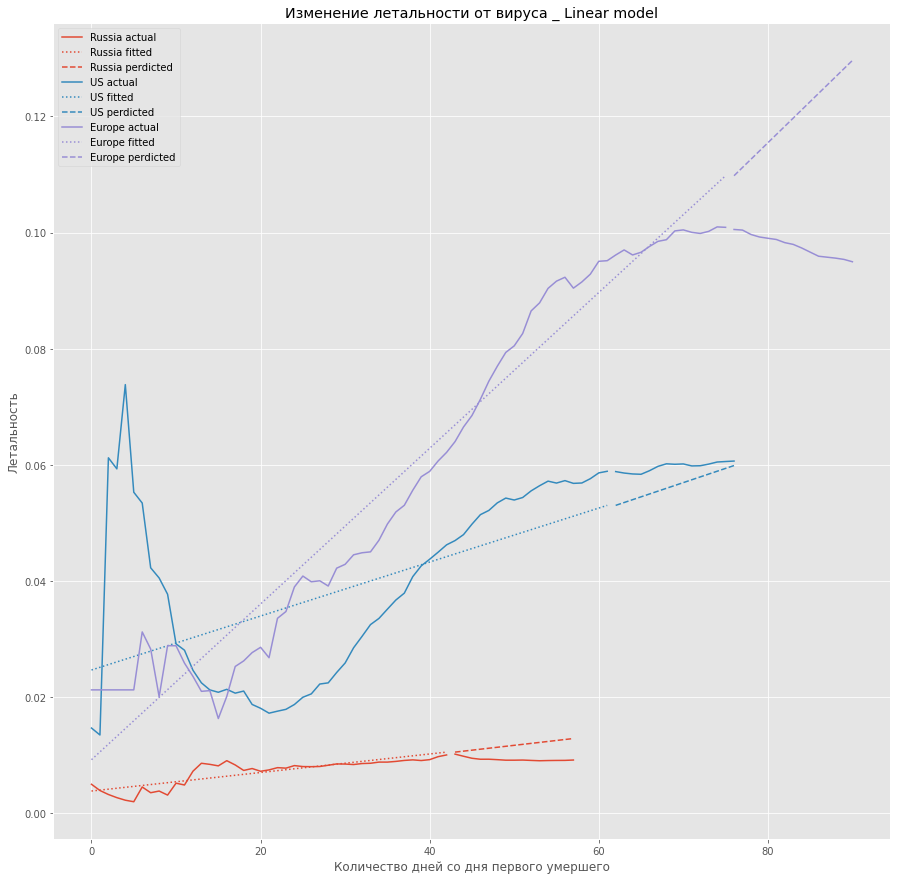

#### Экспоненциальное сглаживание (Exponential smoothing)

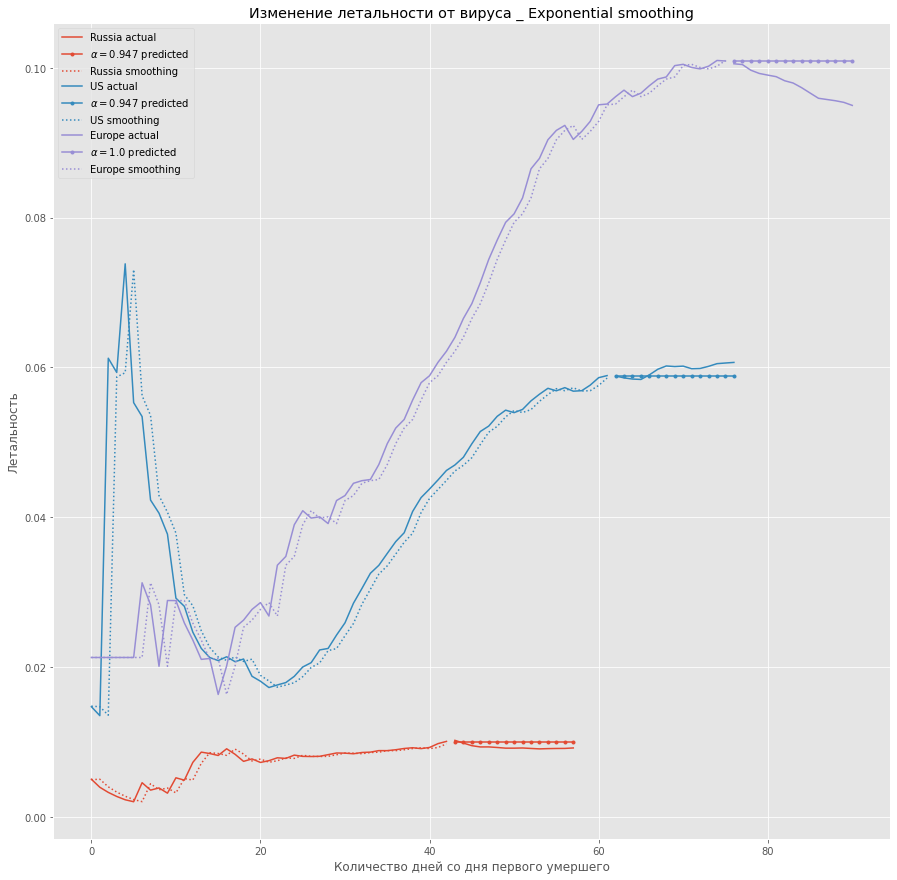

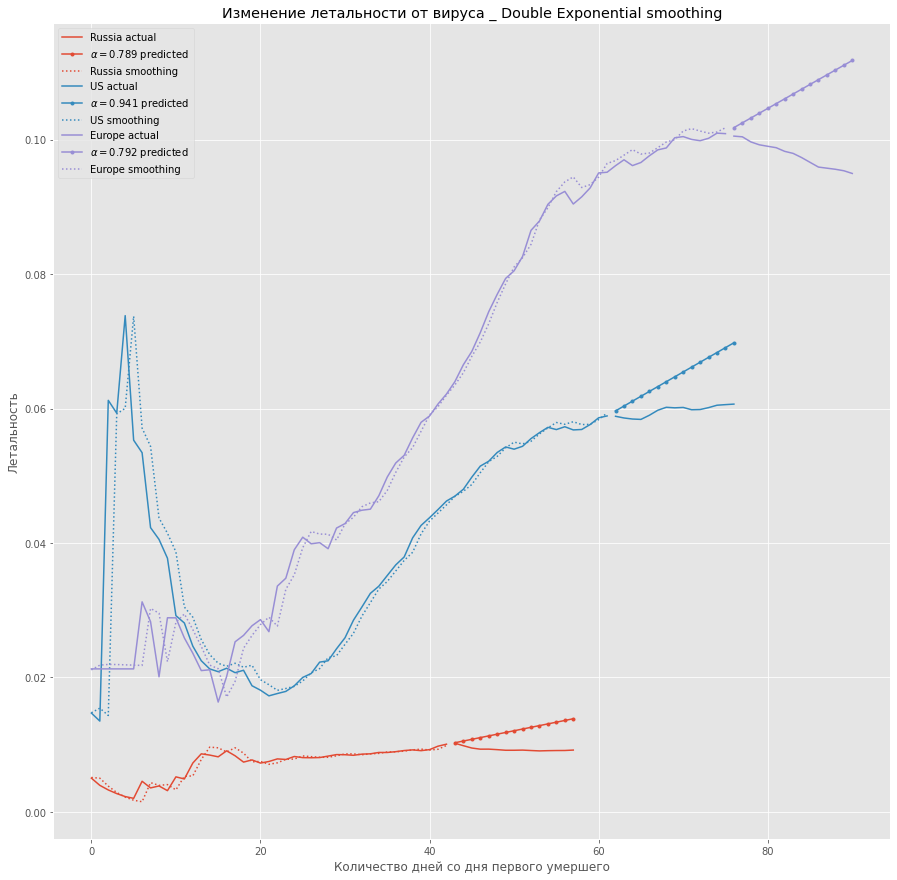

#### Скользящее среднее (MA - Moving average), Авторегрессионная модель (AR - Autoregressive model)

Эксперименты с гиперпараметрами ARIMA модели

Далее будем рассматривать прирост изменения CFR. 

После получения с помощью какой-либо модели прогноза прироста летальности. Будем получать прогноз для самой летальности, прибавив к перому элементу прогноза прироста значение летальности за день до прогноза, а потом посчитав кумулятивную сумму.

Ряд для Russia не стационарен
Ряд для US не стационарен
Ряд для Europe не стационарен


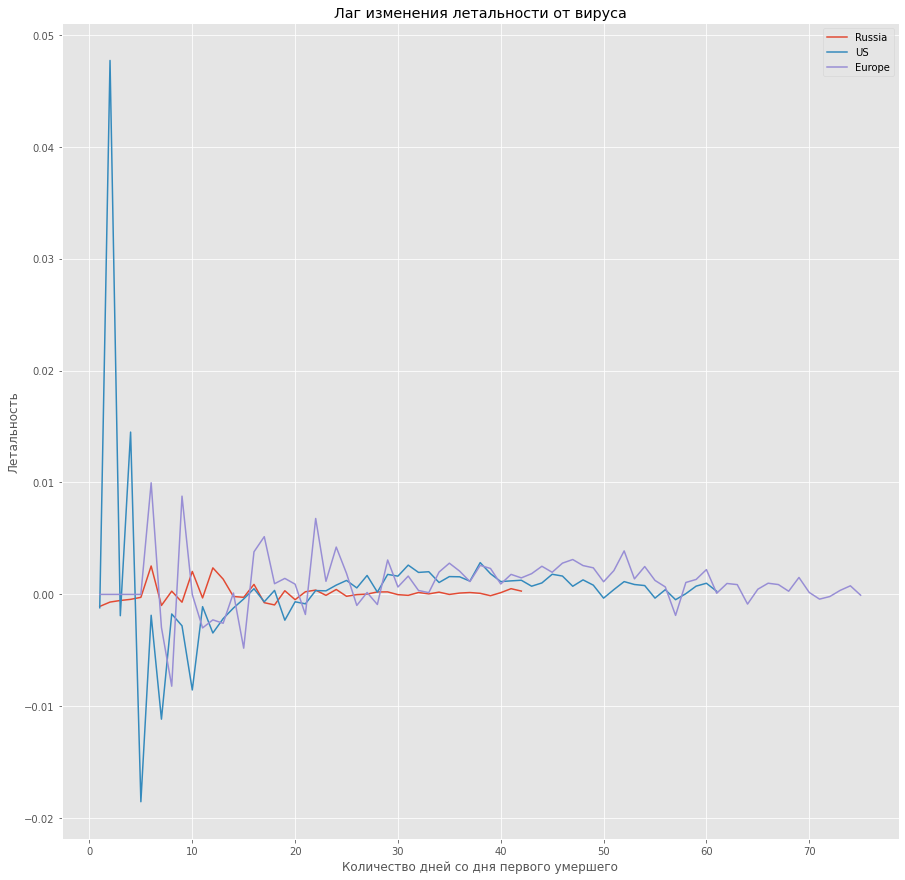

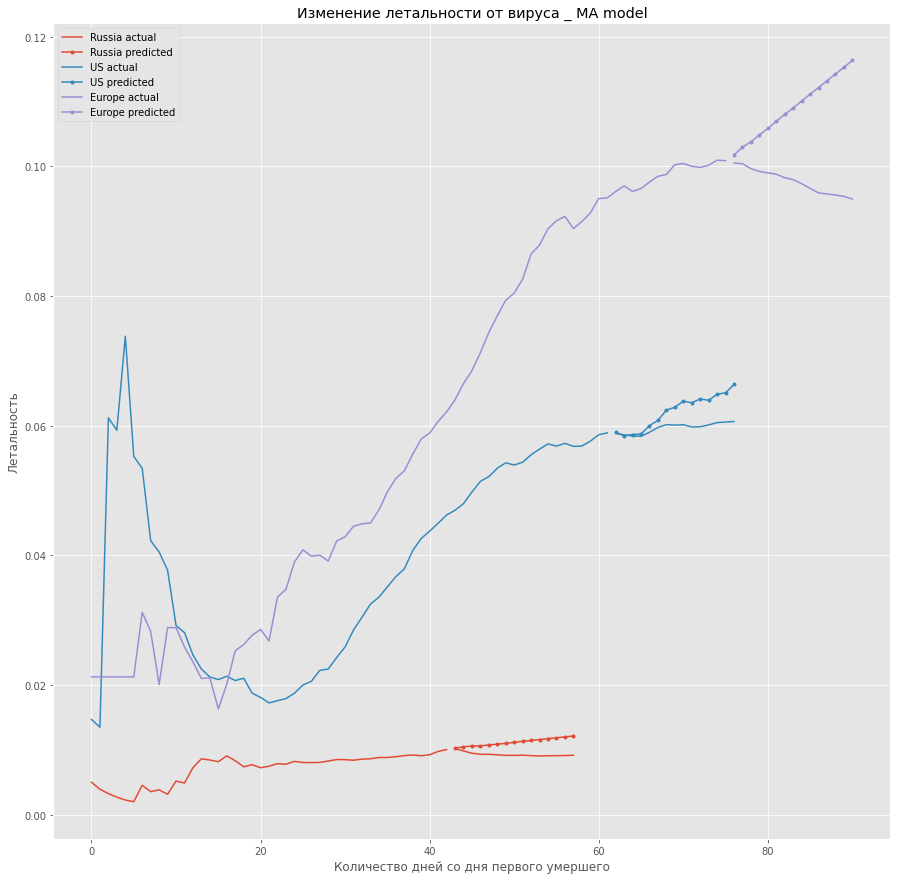

In [0]:
#MA = 6

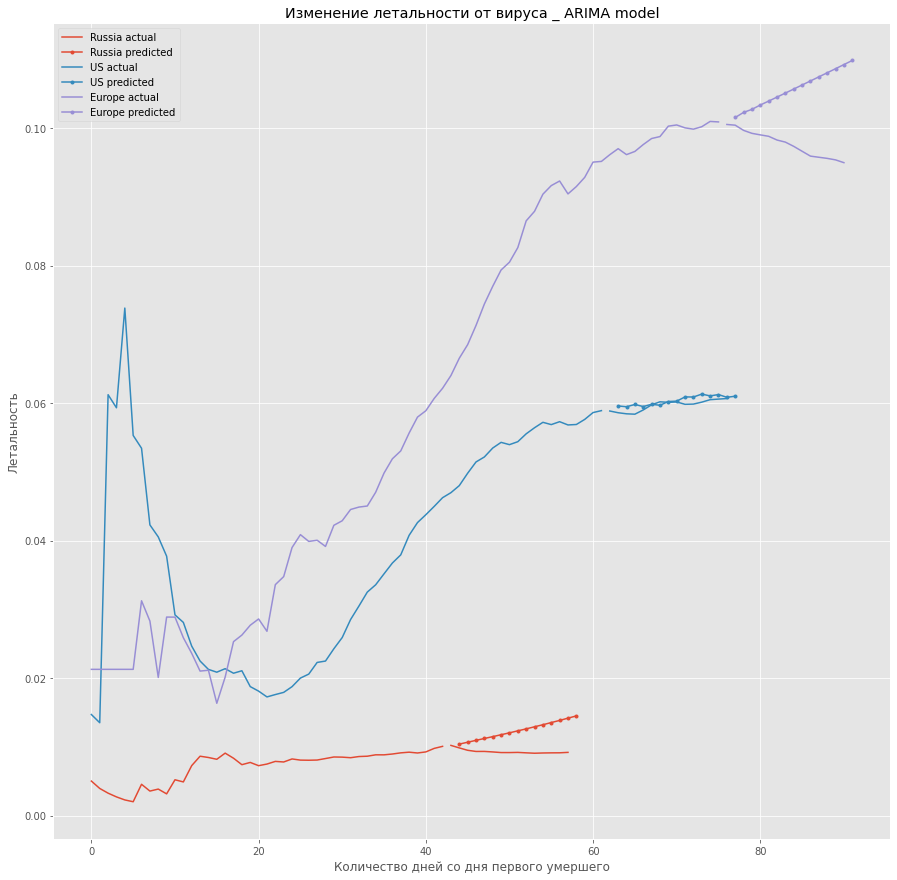

In [0]:
# AR - 3, Integrated - 1, MA - 2

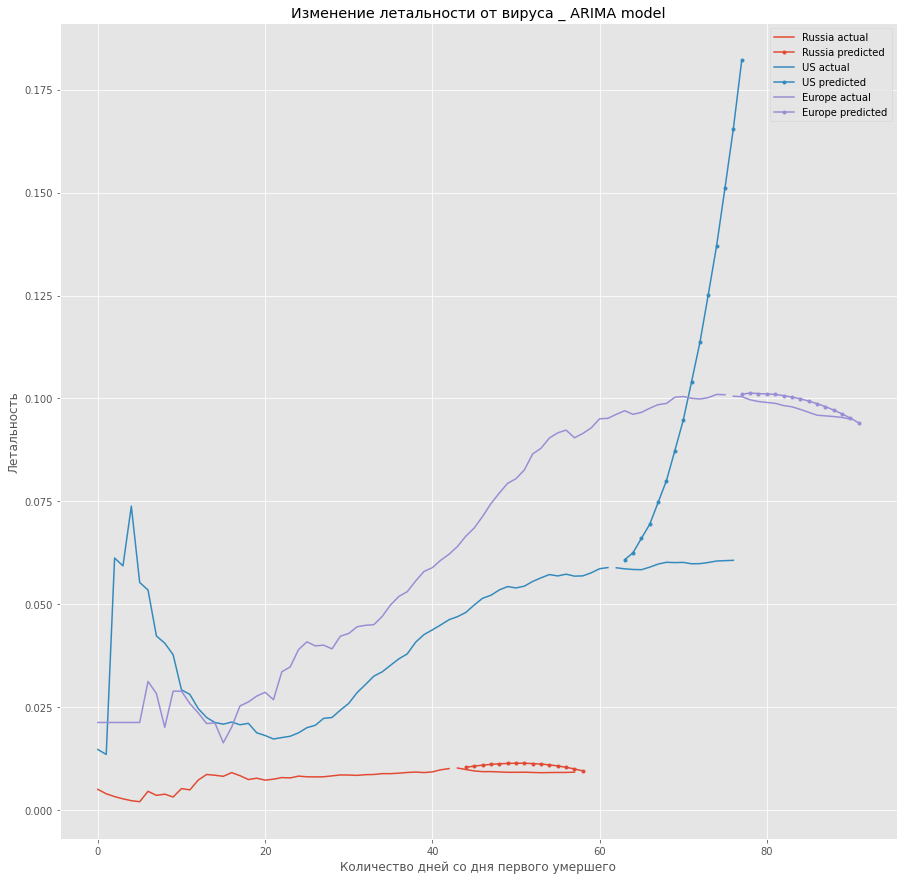

In [0]:
# AR - 2, Integrated - 2, MA - 1

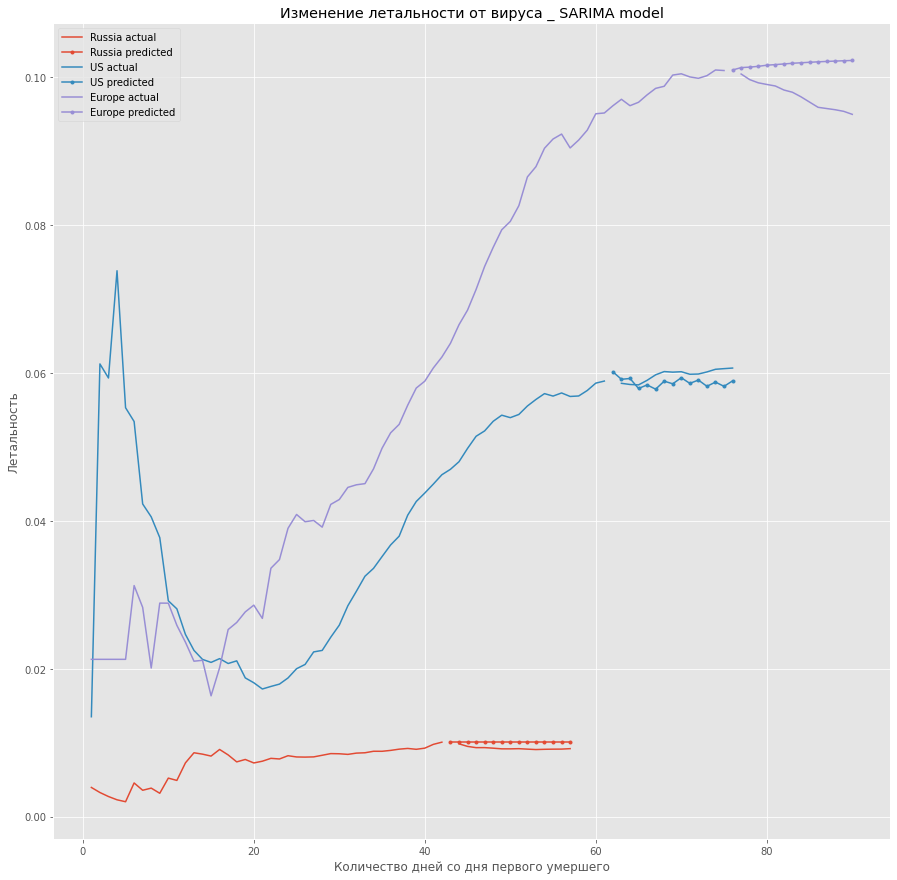

In [0]:
# Seasonality, AR - 3, Integrated - 0, MA - 2

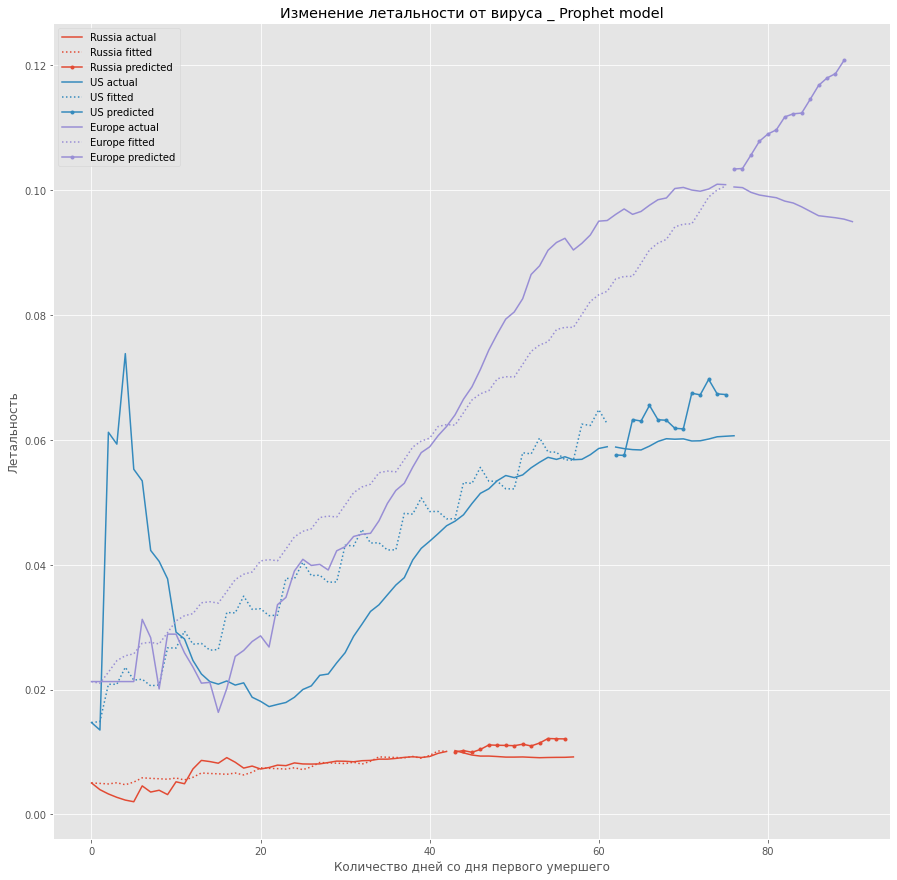

#### Линейная модель с регрессией (Linear Regression Model)

Попробуем составить датафрейм с лагами (до 7 порядка, как дней в неделе), текущей датой и днем недели. Наиболее значимыми, как и ожидалось, оказались лаги.

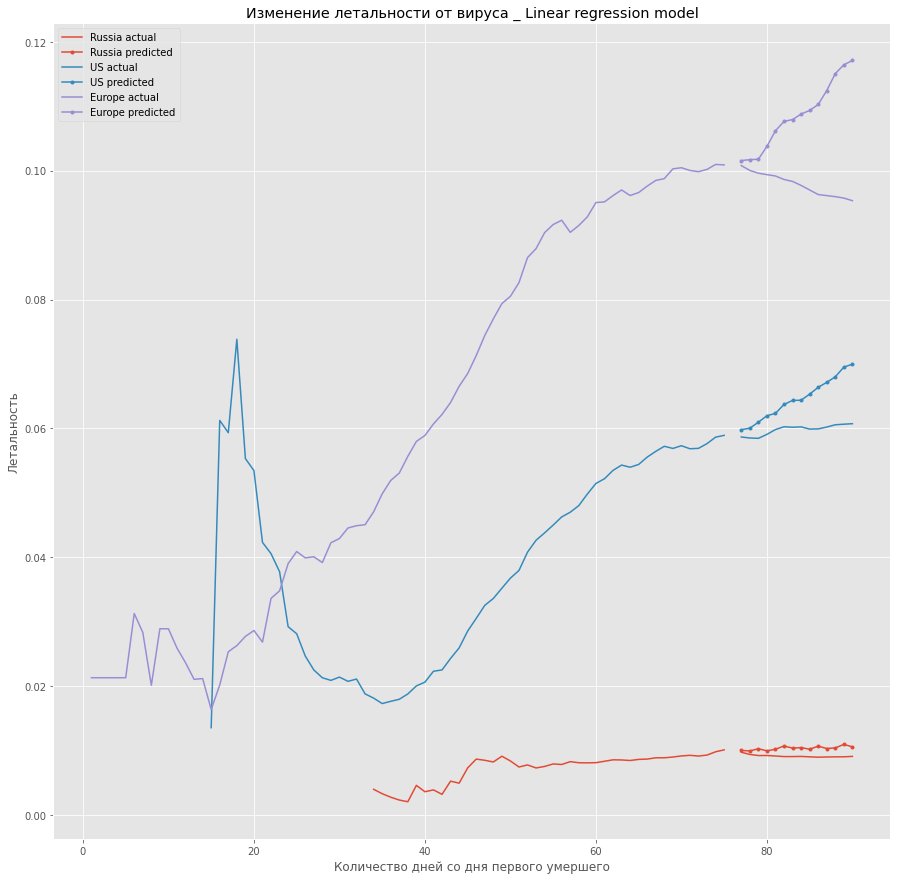

#### Алгоритм градиентного бустинга на деревьях решений

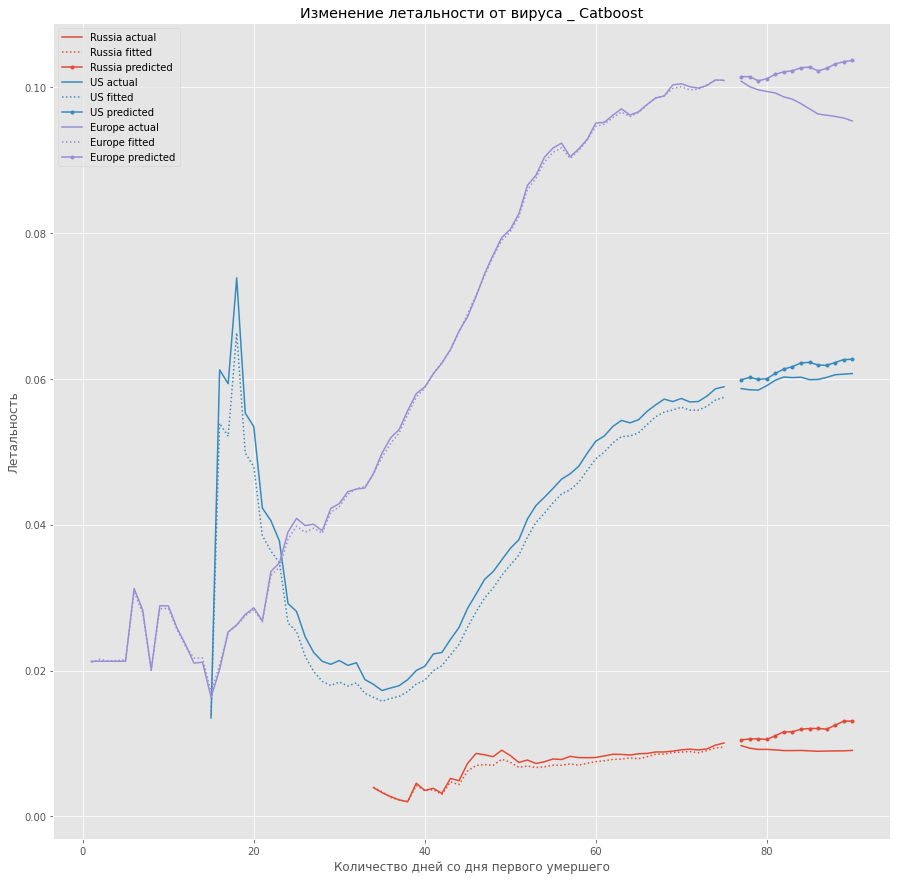

#### Обычная линейная регрессия (не для временных рядов, библиотека Sklearn)

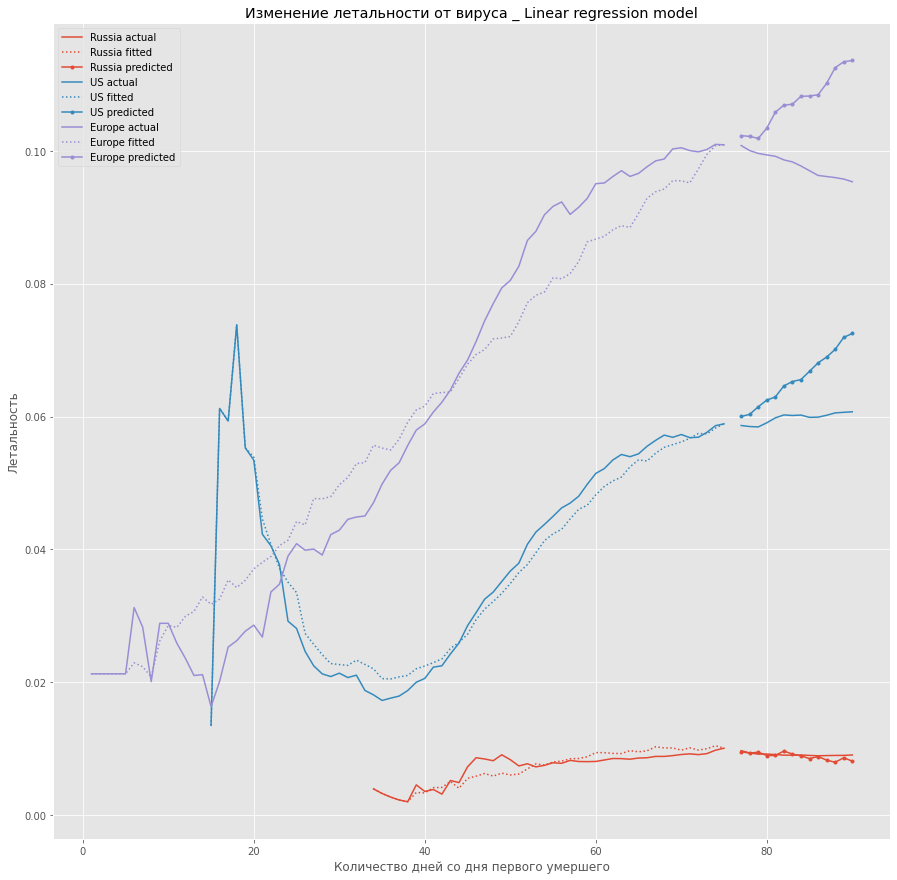

In [0]:
results = results.append(value_, ignore_index=True)
results

,Model,Russia RMSE,US RMSE,Europe RMSE
0,Mean Constant Model,0.002207,0.021048,0.038887
1,Linear Trend Model,0.002599,0.003529,0.023393
2,Exponential smoothing,0.000797,0.001100,0.003686
3,Double Exponential smoothing,0.003066,0.005619,0.010328
4,"ARIMA(6, 0, 0)",0.002060,0.003131,0.012997
5,"ARIMA(1, 0, 0)",0.001891,0.005667,0.013423
6,"ARIMA(2, 0, 0)",0.001932,0.016591,0.013672
7,"ARIMA(0, 0, 1)",0.001887,0.005622,0.013477
8,"ARIMA(0, 0, 6)",0.002512,0.001567,0.012080
9,"ARIMA(0, 0, 2)",0.001957,0.010223,0.013746


In [0]:
# Лучшие результаты

Russia RMSE Linear regression (Sklearn) 0.000566392459263361
US RMSE ARIMA(3, 1, 2) 0.0008337349242050706
Europe RMSE ARIMA(3, 2, 1) 0.0013496558722459451
